# Einführung

## Über dieses Notebook
In diesem Notebook zeige ich euch die **Grundlagen der Python-Programmierung** mit Schwerpunkt auf maschinellem Lernen. Ich stelle wichtige Bibliotheken wie **Numpy**, **Pandas**, **Scikit-learn** und **Matplotlib** vor und zeige euch, wie ihr diese für die Analyse und Modellierung von Daten verwenden könnt. Am Ende dieses Tutorials solltet ihr mit den Python-Grundlagen vertraut sein und diese Bibliotheken verwenden können, um einfache Modelle für maschinelles Lernen zu erstellen.

----
# Machine Learning
Machine Learning ist ein Bereich der künstlichen Intelligenz, der es Computern ermöglicht, aus Daten zu lernen und Muster oder Zusammenhänge zu erkennen.

Im kommenden Abschnitt werden wir das Thema anhand eines Beispiels näher beleuchten. Konkret werden wir eine einfache Klassifikation mit Hilfe einer logistischen Regression durchführen.

## Einrichten der Umgebung
In diesem Abschnitt erfährst du, wie du notwendige Python-Bibliotheken wie numpy, pandas, scikit-learn und matplotlib usw. installierst und erhältst eine kurze Erklärung zu den Funktionen jeder Bibliothek.

In [12]:
# Name der Bibliothek und Abküzung
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hier werden nur bestimmte Funktion aus der Bibliothek sklearn importiert
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Hier wird der Download für den Datensatz vorbereitet
file_id = '1uujka4TJygnHSrai5rDmao8z9SeP_PsE'
download_link = f"https://drive.google.com/uc?id={file_id}"

## Den Datensatz verstehen
Hier geht es darum, einen geeigneten Datensatz auszuwählen, ihn mit pandas zu laden und die verschiedenen Merkmale und grundlegende Statistiken des Datensatzes zu verstehen.

In [13]:
# Einen Datensatz mit Pandas laden
df = pd.read_csv(download_link)

In [14]:
# Die ersten fünf Zeilen des Datensatzes anzeigen lassen
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Übersicht über den Datensatz und seine Eigenschaften anzeigen lassen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Diese Übersicht bietet wertvolle Informationen:
*   Der Datensatz umfasst 891 Zeilen und 12 Spalten.
*   Die Spalten ["Name", "Sex", "Ticket", "Cabin", "Embarked"] haben den Datentyp 'object', der später in einen numerischen Datentyp umgewandelt werden muss.
*   In den Spalten ["Age", "Cabin", "Embarked"] sind Nullwerte vorhanden.

In [16]:
# Die Funktion describe() erzeugt eine statistische Zusammenfassung des DataFrames 'df'
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


  - Der Datensatz enthält Informationen über 891 Passagiere.
  - Etwa __38,38% der Passagiere in diesem Datensatz haben überlebt__, wie der Durchschnittswert von 0,3838 zeigt.
  - Die __durchschnittliche Klasse (Pclass) der Passagiere liegt bei ungefähr 2,31__, was darauf hindeutet, dass die Mehrheit der Passagiere in der 2. und 3. Klasse waren.
  - Das __durchschnittliche Alter der Passagiere beträgt ungefähr 29,7 Jahre__. Der jüngste Passagier ist etwa 0,42 Jahre alt (wahrscheinlich einige Monate alt) und der älteste 80 Jahre.
  - Im Durchschnitt haben Passagiere __0,52 Geschwister oder Ehepartner__ bei sich. Die höchste beobachtete Anzahl liegt bei 8.
  - Die __meisten Passagiere reisten ohne Eltern oder Kinder__ (durchschnittlicher Parch-Wert beträgt etwa 0,38). Einige hatten jedoch bis zu 6 Eltern oder Kinder bei sich.
  - Der __durchschnittliche Fahrpreis für Passagiere beträgt etwa 32,20 USD__. Die Fahrpreise variieren stark, wobei 50% der Passagiere zwischen 7,91 und 31 USD zahlen. Der höchste beobachtete Fahrpreis beträgt 512,33 USD.

In [17]:
# "Unique Values" einer bestimmten Spalte anzeigen lassen
print("Unique Values: ", df['Embarked'].unique())
print(df['Embarked'].value_counts()) # Ignoriert fehlende Werte

Unique Values:  ['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


__Aufgabe:__ Finde heraus welche "Unique Values" die Spalte "Pclass" hat

----
## Exploratory Data Analysis (EDA)
Die explorative Datenanalyse spielt eine entscheidende Rolle im maschinellen Lernen, da sie dabei hilft, ein tieferes Verständnis der Daten zu gewinnen. Dieser Prozess kann mithilfe von Bibliotheken wie pandas, matplotlib und seaborn durchgeführt werden, um verschiedene Visualisierungen wie Histogramme, Boxplots und Streudiagramme zu erstellen, die dabei helfen, Muster, Ausreißer und Beziehungen in den Daten zu identifizieren und zu interpretieren.

### Histogramm: Welcher Anteil hat überlebt?

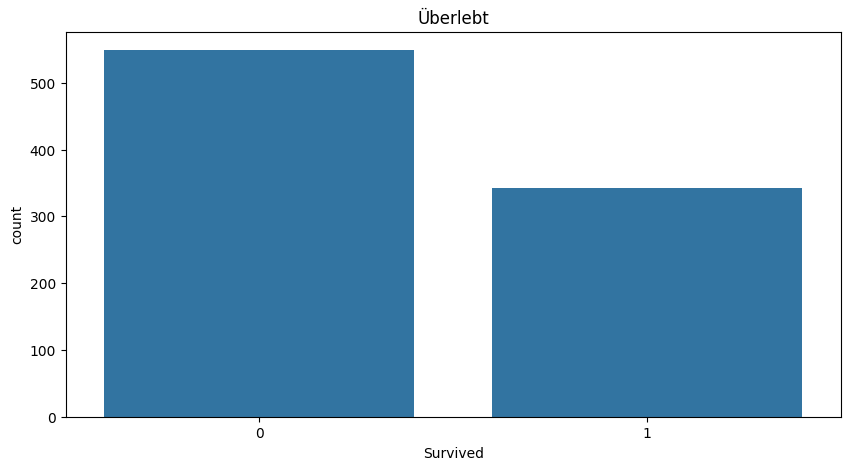

In [18]:
# Erstellen einer Abbildung
plt.figure(figsize=(10, 5))
# Ein Countplot (Balkendiagramm) auf dem Unterpunkt zeichnen
sns.countplot(x='Survived', data=df)
# Titel für den Unterpunkt festlegen
plt.title('Überlebt')
# Das Diagramm anzeigen
plt.show()

**Aufgabe:** Erstelle ein ähnliches Histogram für die Variable "Sex"

### Histogramm: Für die Variablen Age und Fare, um zu wissen, wie die Verteilungen der Werte aussehen

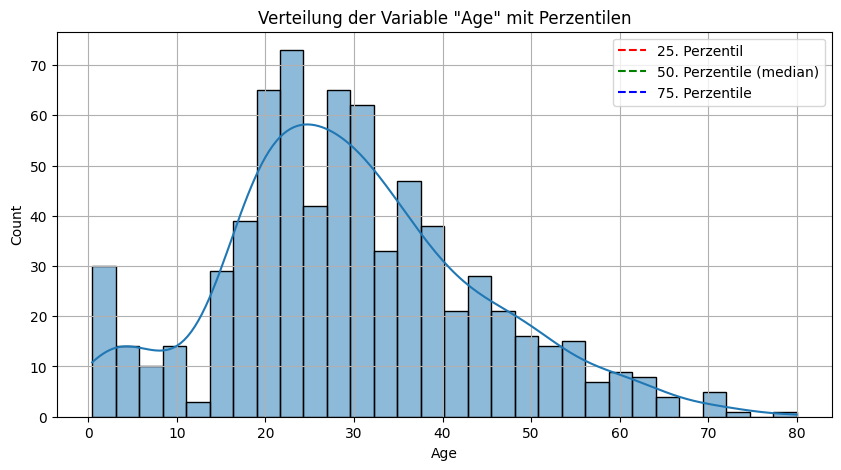

In [19]:
# Percentiles berechnen
q25_age = np.percentile(df.Age, 25)
q50_age = np.percentile(df.Age, 50)
q75_age = np.percentile(df.Age, 75)

# Verteilung plotten
plt.figure(figsize=(10, 5))
sns.histplot(df.Age, kde=True, bins=30)

# Vertikale Linien für Perzentile hinzufügen
plt.axvline(x=q25_age, color='red', linestyle='--', label='25. Perzentil')
plt.axvline(x=q50_age, color='green', linestyle='--', label='50. Perzentile (median)')
plt.axvline(x=q75_age, color='blue', linestyle='--', label='75. Perzentile')

plt.legend()
plt.grid()
plt.title('Verteilung der Variable "Age" mit Perzentilen')
plt.show()

**Aufgabe:** Erstelle ein ähnliches Histogram für die Variable "Fare"

Die Variable 'Fare' hat einen Ausreißer, den wir entfernen sollten


In [20]:
# Finde den maximalen Wert in der Spalte 'Fare'
max_fare = df['Fare'].max()

# Entferne Zeilen, in denen 'Fare' diesen maximalen Wert hat
df = df[df['Fare'] != max_fare]

### Korrelation: Wie groß ist der Zusammenhang zwischen den Variablen im Datensatz

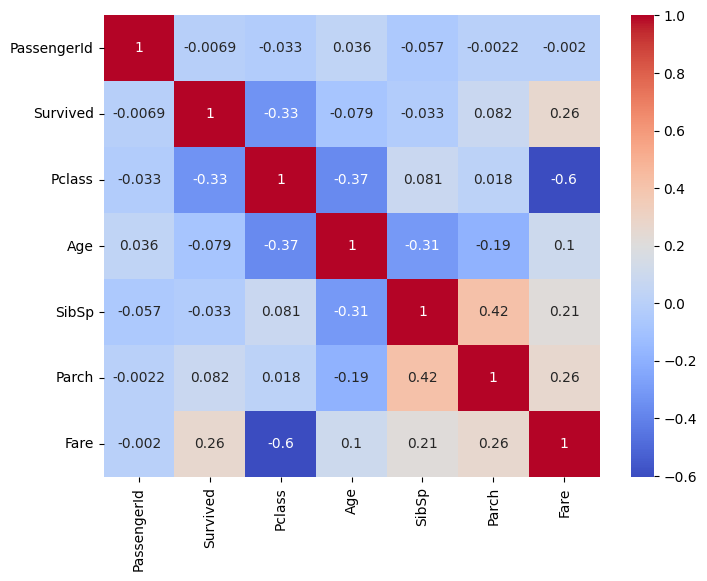

In [21]:
# Heatmap erstellen
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

**Aufgabe:** Prüfe, ob starke Korrelationen zwischen den Variablen vorliegen (nahe an 1 oder -1)

----
## Datenbereinigung
In diesem Abschnitt kümmern wir uns um die Nullwerte und werden alle Spalten mit dem Datentyp 'object' in einen numerischen Datentyp umwandeln.

### Mit Nullwerten umgehen

In [22]:
# Wiederholung: In welchen Spalten waren Nullwerte?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


- Age: 177 Nullwerte
- Cabin: 687 Nullwerte
- Embarked: 2 Nullwerte

In [23]:
# Da in der Spalte 'Cabin' viele Werte fehlen, werden wir die gesamte Spalte aus dem Datensatz entfernen
df.drop('Cabin', axis=1, inplace=True) # (axis=1 entfernt Spalten)

In [24]:
# Entferne alle Zeilen, mit einem Nullwert in der Spalte 'Age'
df.dropna(subset=['Age'], axis=0, inplace=True) # (axis=0 entfernt Zeilen)

**Aufgabe:** Entferne alle Zeilen, mit einem Nullwert in der Spalte 'Embarked'

### Feature Engineering
Feature Engineering ist ein Prozess im Machine Learning, bei dem aus vorhandenen Daten neue relevante Merkmale oder Attribute extrahiert werden. Beispielsweise kann es sinnvoll sein, die Werte des Attributs 'Alter' zu modifizieren. Kontinuierliche Werte wie beim 'Alter' können bei der Modellierung Herausforderungen darstellen. Deshalb könnte ein neues Attribut erstellt werden, das das Alter in verschiedene Altersgruppen einteilt.

In [25]:
# Erstelle neues Attribut mit Altergruppen
df['Age_group'] = 0
df.loc[df['Age'] <= q25_age, 'Age_group'] = 0
df.loc[(df['Age'] > q25_age) & (df['Age'] <= q50_age), 'Age_group'] = 1
df.loc[(df['Age'] > q50_age) & (df['Age'] <= q75_age), 'Age_group'] = 2
df.loc[df['Age'] > q75_age, 'Age_group'] = 3

**Aufgabe:** Erstelle ein neues Attribut, in welchem die Werte aus 'Fare' kategorisch umgewandelt werden. Verwende dafür die berechneten Percentile aus der EDA (q25_fare, q50_fare und q75_fare). Entferne anschließend die Attribute 'Age' und 'Fare'.

### Strings in numerische Werte umwandeln
In Machine-Learning-Projekten ist es oft erforderlich, Strings in numerische Werte umzuwandeln, da viele Algorithmen nur mit numerischen Werten arbeiten können.

In [26]:
df['Sex'].replace(['male','female'], [0, 1], inplace=True)

/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_60675/22350698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['male','female'], [0, 1], inplace=True)
/var/folders/13/3pzxxwtd6cbdvdzq_lc6112r0000gn/T/ipykernel_60675/22350698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

**Aufgabe:** Konvertiere die Werte der Spalte 'Embarked' in numerische Werte.

### Weitere unwichtigen Attribute entfernen

**Aufgabe:** Die Attribute 'Name', 'Ticket' und 'PassengerId' erscheinen irrelevant. Bitte entferne diese.

----
## Predictive Modeling
In diesem Abschnitt konzentrieren wir uns auf das prädiktive Modellieren. Dabei verwenden wir unser DataFrame 'df', um unsere Feature-Variablen 'X' und die Zielvariable 'y' zu erstellen, wobei 'y' die zu prognostizierende Spalte 'Sex' darstellt. Nachdem wir unsere Daten in Trainings- und Testsets unterteilt haben, trainieren wir ein LogisticRegression-Modell und evaluieren dessen Leistung anhand von Accuracy (Genauigkeit) und ROC AUC (Area under the curve).

In [27]:
# Hier wird die Spalte 'Sex' aus dem DataFrame 'df' entfernt und der resultierende DataFrame in 'X' gespeichert.
# 'X' enthält somit alle Feature-Variablen, die für die Vorhersage verwendet werden sollen.
X = df.drop('Sex', axis=1)

# 'y' wird als die Zielvariable definiert und enthält die Werte der Spalte 'Sex' aus 'df'.
# Dies ist die Variable, die wir mit unserem Modell vorhersagen möchten.
y = df['Sex']

In [28]:
# Mit Hilfe der 'train_test_split'-Funktion wird der Datensatz in Trainings- und Testdaten unterteilt.
# 'random_state=42' stellt sicher, dass die Aufteilung reproduzierbar ist (seed).
# 'stratify=y' sorgt dafür, dass die Aufteilung der Daten in Training und Test die gleiche Verteilung der Zielvariable 'Survived' beibehält.
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, stratify=y)

In [29]:
# Hier wird ein Modell mit der Klasse LogisticRegression erstellt.
# Die Funktion .fit() sorgt dann dafür, dass unser Modell trainiert wird.
model = LogisticRegression()
model.fit(xtrain, ytrain)

ValueError: could not convert string to float: 'Pengelly, Mr. Frederick William'

In [ ]:
# Die Genauigkeit (Accuracy) / ROC AUC des Modells auf dem Testdatensatz wird berechnet und ausgegeben.
print('Accuracy: ', accuracy_score(model.predict(xtest), ytest))
print('ROC AUC: ', roc_auc_score(ytest, model.predict_proba(xtest)[:, 1]))

**Aufgabe:** Wiederhole den Teil 'Predictive Modeling' mit dem Attribut 'Survived' als Zielvariable (y)